In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np


In [2]:
file_path = 'Resources/crypto_data.csv'

In [3]:
#Read crypto_data.csv into Pandas
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
#Discard all cryptocurrencies that are not being traded
df = df[df["IsTrading"] == True]
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [5]:
#Drop the IsTrading column from the dataframe
df = df.drop(columns=["IsTrading"])
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [7]:
#Remove all rows that have at least one null value
df = df.dropna()
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
df = df[df["TotalCoinsMined"] > 0]
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
#Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe
df = df.drop(columns=["CoinName", "Unnamed: 0"])
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
#Convert the remaining features with text values, Algorithm and ProofType, into numerical data
df = pd.get_dummies(df)
df

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Standardize the dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(532, 377)

In [12]:
# Applying PCA to reduce dimensions. Initialize PCA model
pca = PCA(n_components=0.90)
df_pca = pca.fit_transform(df_scaled)
df_pca.shape

(532, 274)

In [13]:
# Initialize t-SNE model. Reduce dimensions
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

(532, 2)

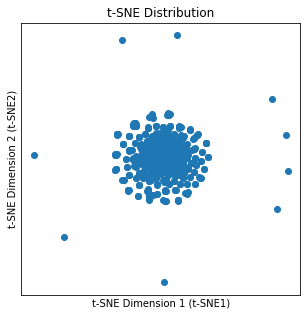

In [14]:
# Prepare to plot the dataset
plt.figure(figsize=(5, 5))
plt.scatter(
    x = tsne_features[:,0],
    y = tsne_features[:,1],
)
plt.title("t-SNE Distribution")
plt.xlabel('t-SNE Dimension 1 (t-SNE1)')
plt.ylabel('t-SNE Dimension 2 (t-SNE2)')
plt.xticks([])
plt.yticks([])
plt.savefig("Images/tsne.png", transparent=False)
plt.show()

In [15]:
# Initializing K-Mean model. Identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,180573.300245
1,2,179504.125707
2,3,178201.416986
3,4,177297.463513
4,5,175747.198052


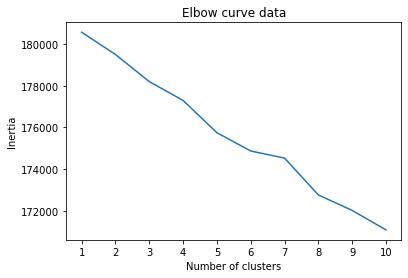

In [16]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve data')
plt.savefig("Images/kmeans.png")
plt.show()

## Recommendation
Based on our K-Means elbow method findings, we would not recommend investments into crypto to our clients. As we can see, Cryptocurrencies cannot be clustered together, because we don't have a defind elbow curve to determine what would be a good cluster number.  